In [1]:
import math
import time
import numpy as np
import torch
from matplotlib import pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [3]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [4]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.05510 sec'

In [5]:
timer.start()
e = a + b
f'{timer.stop():.5f} sec', e

('0.00000 sec', tensor([2., 2., 2.,  ..., 2., 2., 2.]))

In [6]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

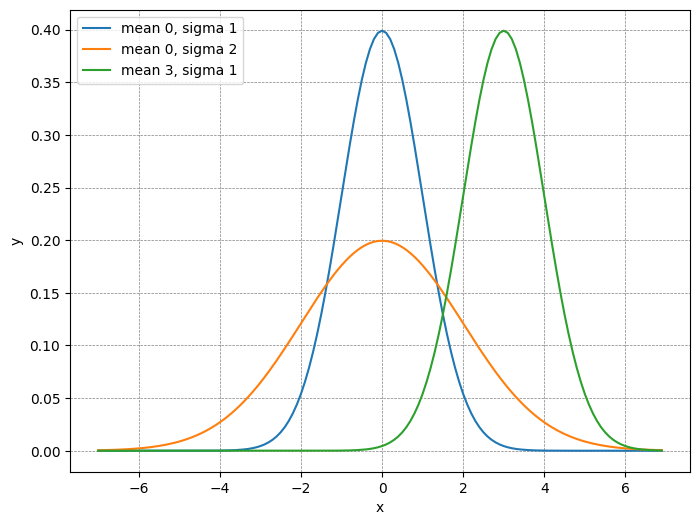

In [7]:
def plot(plt, x, y, label):
    plt.plot(x, y, label=label)
    plt.set_xlabel('x')
    plt.set_ylabel('y')
    plt.legend()
    plt.grid(color='gray', linestyle='--', linewidth=0.5)


fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(-7, 7, 0.1)

params = [(0, 1), (0, 2), (3, 1)]

for mu, sigma in params:
    plot(ax, x, normal(x, mu, sigma), f'mean {mu}, sigma {sigma}')

plt.show()